<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Trial" data-toc-modified-id="First-Trial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First Trial</a></span></li><li><span><a href="#Who-Contributes-Most?---components_" data-toc-modified-id="Who-Contributes-Most?---components_-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Who Contributes Most? - <code>components_</code></a></span></li><li><span><a href="#Find-the-Best-N-Components-Among-the-3-Features" data-toc-modified-id="Find-the-Best-N-Components-Among-the-3-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find the Best N Components Among the 3 Features</a></span></li><li><span><a href="#Find-the-Best-N-Components-Among-the-All-Features" data-toc-modified-id="Find-the-Best-N-Components-Among-the-All-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find the Best N Components Among the All Features</a></span></li><li><span><a href="#Dig-More" data-toc-modified-id="Dig-More-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dig More</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
# plt.rc('axes', facecolor='#FFFFFF')

In [3]:
from sklearn.decomposition import PCA

In [4]:
star98_df = sm.datasets.star98.load_pandas().data
X = star98_df[['LOWINC', 'PERMINTE', 'PERHISP']]

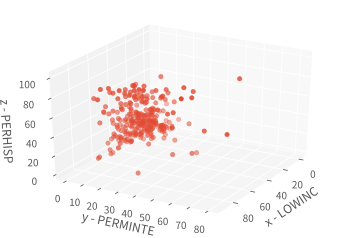

In [5]:
with plt.rc_context({'axes.facecolor': '#FFFFFF'}):

    fig = plt.figure()

    # https://matplotlib.org/mpl_toolkits/mplot3d/api.html#module-mpl_toolkits.mplot3d.axes3d
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('x - LOWINC')
    ax.set_ylabel('y - PERMINTE')
    ax.set_zlabel('z - PERHISP')

    ax.scatter(X.LOWINC, X.PERMINTE, X.PERHISP)

    # view_init(elev=None, azim=None)
    #
    # - ‘elev’ stores the elevation angle in the z plane.
    # - ‘azim’ stores the azimuth angle in the x, y plane.
    #
    # ref: https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init
    ax.view_init(30, 30)

# Principal Component Analysis

Using the matrix factorization: singular value decomposition (SVD).
    
$ \mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{W}^T $

* $ \mathbf{\Sigma} $: n-by-p, the diagonal are singular values $ \sigma_k $.
* $ \mathbf{U} $: n-by-n, the columns are left singular vectors.
* $ \mathbf{W} $: p-by-p, the columns are right singular vectors.

A great visualization: http://setosa.io/ev/principal-component-analysis/ .

## First Trial

In [6]:
pca = PCA(n_components=2)

In [7]:
# fit the model with X, and apply the dimensionality reduction on X
X_pca = pca.fit_transform(X)

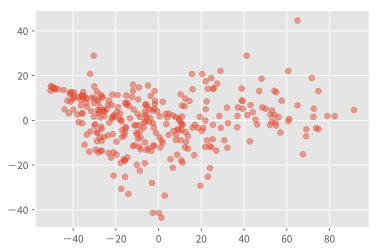

In [8]:
# [:, 0]: all rows and the first column
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.5)

## Who Contributes Most? - `components_`

In [9]:
pca_comp_df = pd.DataFrame(
    data=pca.components_,
    index=['comp_1', 'comp_2'],
    columns=['LOWINC', 'PERMINTE', 'PERHISP']
)
pca_comp_df

,LOWINC,PERMINTE,PERHISP
comp_1,0.579483,0.271801,0.768326
comp_2,-0.813959,0.240290,0.528896


* `components_`: principal axes in feature space, representing the directions of maximum variance in the data.

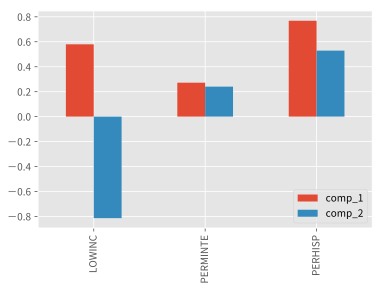

In [10]:
pca_comp_df.T.plot.bar()

In [11]:
# comp_1, comp_2
pca.explained_variance_ratio_

array([0.81222025, 0.1184548 ])

## Find the Best N Components Among the 3 Features

In [12]:
n = 3
my_X = X

In [13]:
my_pca_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_pca_score_df

In [14]:
for i in my_pca_score_df.index:
    my_pca = PCA(n_components=i)
    my_pca.fit(my_X)
    my_pca_score_df.loc[i, 'score'] = my_pca.score(my_X)  # -> the average log-likelihood of all samples

In [15]:
pca_score_df_3 = my_pca_score_df
pca_score_df_3

,score
1,-12.407732
2,-12.372278
3,-12.372278


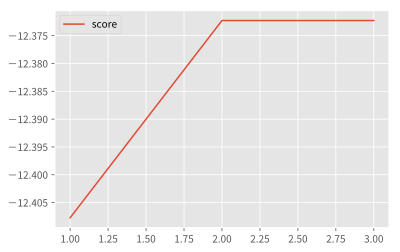

In [16]:
pca_score_df_3.plot()

## Find the Best N Components Among the All Features

In [17]:
n = 14
my_X = star98_df.iloc[:, :14]

In [18]:
my_pca_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_pca_score_df

In [19]:
for i in my_pca_score_df.index:
    my_pca = PCA(n_components=i)
    my_pca.fit(my_X)
    my_pca_score_df.loc[i, 'score'] = my_pca.score(my_X)

In [20]:
pca_score_df_all = my_pca_score_df
pca_score_df_all

,score
1,-84.510798
2,-63.617255
3,-61.814531
4,-60.078136
5,-59.236258
6,-58.594189
7,-57.666167
8,-57.211691
9,-56.784041
10,-56.287644


Text(3,-67.5,'2 comps')

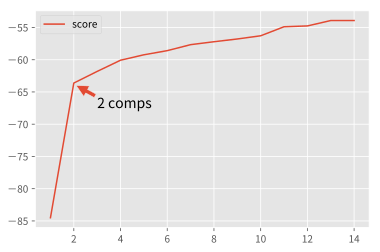

In [21]:
pca_score_df_all.plot()
plt.annotate(
    xy=(2.1, -64),
    arrowprops=dict(facecolor='#E24A33'),
    xytext=(3, -67.5),
    s='2 comps', size=14,
)

## Dig More

* [sklearn.decomposition.PCA – Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
* [Principal component analysis – Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)